In [ ]:
## Import Library & Load Cleaned Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data hasil EDA
df = pd.read_csv(...)

print("Data siap untuk modeling segmentasi!")
display(df.head())

Data siap untuk modeling segmentasi!


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn,Net Revenue,Year,Month_Year,Age Group
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,0,Christine Hernandez,37,Male,0,740,2020,2020-09,Adult
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,0,Christine Hernandez,37,Male,0,2739,2022,2022-03,Adult
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,0,Christine Hernandez,37,Male,0,3196,2022,2022-05,Adult
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,0,Christine Hernandez,37,Male,0,3509,2020,2020-11,Adult
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,0,James Grant,49,Female,1,3452,2020,2020-11,Adult


In [3]:
## Pilih Data untuk Clustering

# Memilih fitur untuk clustering
features = ['Age', 'Total Purchase Amount', 'Returns']
X = df[features]

# Standarisasi Data (Penting karena skala Age dan Total Purchase berbeda jauh)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data telah diskalakan (scaling) agar adil bagi semua fitur.")

Data telah diskalakan (scaling) agar adil bagi semua fitur.


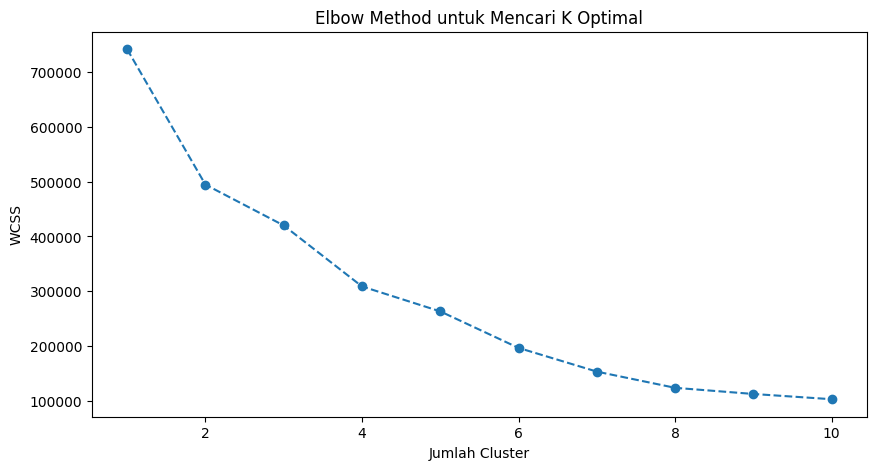

In [4]:
## Mencari Jumlah Cluster Terbaik (Elbow Method)

wcss = [] # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Mencari K Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [5]:
# 1. Menjalankan K-Means dengan k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 2. Melihat jumlah pelanggan di setiap cluster
print("Jumlah Pelanggan per Cluster:")
print(df['Cluster'].value_counts())

# 3. Profiling Cluster: Melihat karakteristik rata-rata setiap kelompok
cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Total Purchase Amount': 'mean',
    'Returns': 'mean'
}).reset_index()

print("\nProfil Rata-rata Pelanggan per Cluster:")
display(cluster_profile)

Jumlah Pelanggan per Cluster:
Cluster
1    73856
3    73787
2    50067
0    49618
Name: count, dtype: int64

Profil Rata-rata Pelanggan per Cluster:


,Cluster,Age,Total Purchase Amount,Returns
0,0,45.184127,3973.071688,1.0
1,1,42.482777,1480.232209,0.0
2,2,42.662592,1487.937684,1.0
3,3,45.441202,3970.949124,0.0


c:\Mini_H\belajar\benv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


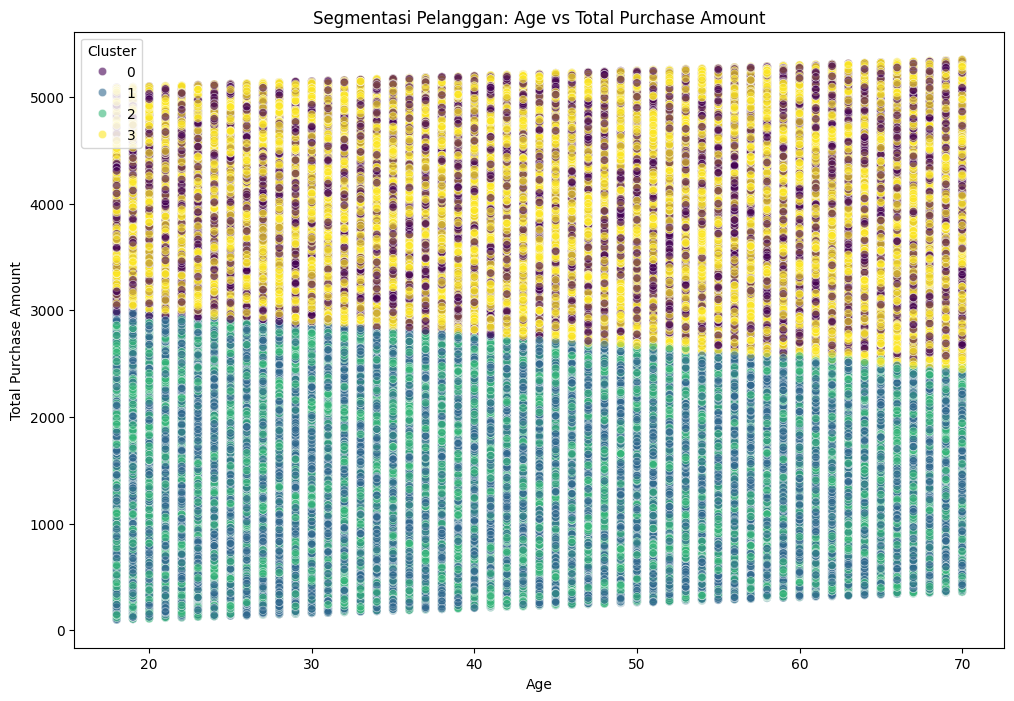

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='Age', 
    y='Total Purchase Amount', 
    hue='Cluster', 
    palette='viridis', 
    alpha=0.6
)
plt.title('Segmentasi Pelanggan: Age vs Total Purchase Amount')
plt.show()

In [7]:
# Jalankan ini untuk melihat angka rata-rata yang sebenarnya
print(df.groupby('Cluster')[['Age', 'Total Purchase Amount', 'Returns']].mean())

               Age  Total Purchase Amount  Returns
Cluster                                           
0        45.184127            3973.071688      1.0
1        42.482777            1480.232209      0.0
2        42.662592            1487.937684      1.0
3        45.441202            3970.949124      0.0


C:\Users\Mugis\AppData\Local\Temp\ipykernel_14516\2379037765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Total Purchase Amount', palette='viridis')


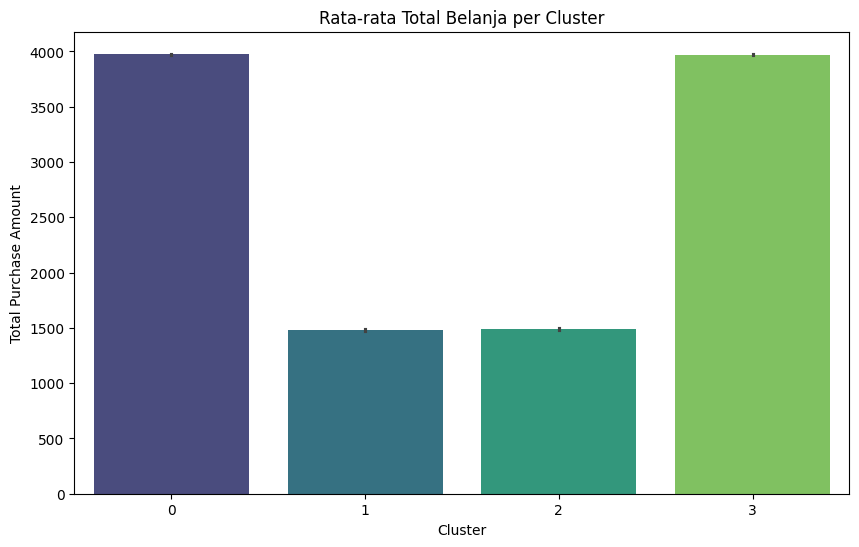

In [8]:
# Visualisasi Total Purchase per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cluster', y='Total Purchase Amount', palette='viridis')
plt.title('Rata-rata Total Belanja per Cluster')
plt.show()

# Berikan narasi/kesimpulan di sel Markdown bawahnya berdasarkan tabel profiling tadi.